In [1]:
# 자료 불러오기 :Excel 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from konlpy.tag import Okt
okt = Okt("C:/Program Files/Java/jdk-12.0.1/bin/server/jvm.dll")
okt = Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:

# Excel 불러오기 
data1 = pd.read_excel('./TCH_CUST_OPNN.xls', '워크시트 익스포트') # 메뉴교환권
data2 = pd.read_excel('./210125_TCH_CUST_OPNN_COUPON.xls', '워크시트 익스포트') # 쿠폰

# 자료 내 중복 제거
# data1.drop_duplicates(subset = ['내용'], inplace=True)

In [27]:
# data1.head(1)

In [5]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += " " + ele.strip()  
    return str1

In [29]:
# 숫자/특수문자 제거
data1['CTT'] = data1['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [30]:
# 1차 가공 : koNLpy to token
def tokenize(doc):
    result = ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] # ex '더빙/Norm', '나다/Verb'
    return result 

token_data1 = [tokenize(row) for row in data1['CTT']]  

In [1]:
# 2차 가공 : 역토큰화 후, 한글만 남김
data_trim2 = []
for i in range(len(data1)):
    t = ' '.join(token_data1[i])
    data_trim2.append(t)
    
data1['CTT'] = data_trim2
data1['CTT'] = data1['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

NameError: name 'data1' is not defined

In [32]:
# 3차 가공 : 역토큰화 내용 다시 토큰화
def tokenize2(doc):
    result = [''.join(t) for t in okt.morphs(doc)] # 말뭉치(명사+ a) ex ['더빙', '나다', ...]
    return result 

data_trim3 = [tokenize2(row) for row in data1['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  ]  

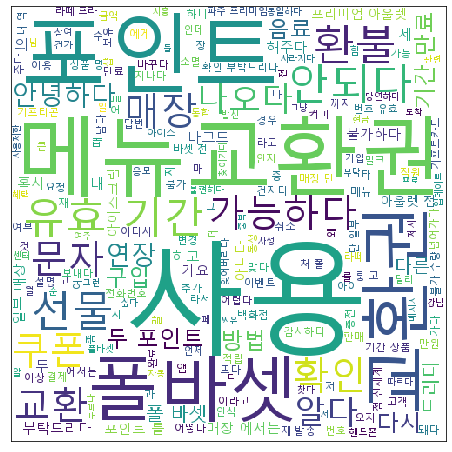

In [46]:
# wordcloud 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)          

from wordcloud import WordCloud

word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
         '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
         '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
         '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
         '도', '을', '한', '로', '안', '못', '만'
        ]

# text = data[data1['gubun']==1]['text'].to_list()
text = data1['CTT'].to_list()
text_all = listToString(text)
text_all = text_all.replace("메뉴 교환 권", "메뉴교환권")
text_all = text_all.replace("교환 권", "교환권")
text_all = text_all.replace("폴바 셋", "폴바셋")
# text_all = text_all.replace("사용", "메뉴교환권")

# worldcloud 생성
wc = WordCloud(font_path= path, stopwords = word1, width = 500, height = 500, background_color="white", repeat=True)
wc.generate(text_all)

mpl.rc('figure', figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(wc, cmap=plt.cm.binary)
# plt.xlabel('전체 / n={:}개'.format(df1.groupby('구매자평점')['구매자평점'].count()))
plt.show()

In [7]:
# 숫자/특수문자 제거
data2['CTT'] = data2['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 1차 가공 : koNLpy to token
def tokenize(doc):
    result = ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] # ex '더빙/Norm', '나다/Verb'
    return result 

token_data1 = [tokenize(row) for row in data2['CTT']]  


# 2차 가공 : 역토큰화 후, 한글만 남김
data_trim2 = []
for i in range(len(data2)):
    t = ' '.join(token_data1[i])
    data_trim2.append(t)
    
data2['CTT'] = data_trim2
data2['CTT'] = data2['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 3차 가공 : 역토큰화 내용 다시 토큰화
def tokenize2(doc):
    result = [''.join(t) for t in okt.morphs(doc)] # 말뭉치(명사+ a) ex ['더빙', '나다', ...]
    return result 

data_trim3 = [tokenize2(row) for row in data2['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  ]  

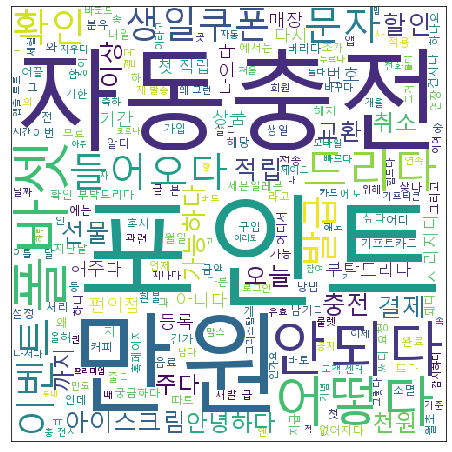

In [26]:
# wordcloud 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)          

from wordcloud import WordCloud

word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
         '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
         '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
         '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
         '도', '을', '한', '로', '안', '못', '만', '를', '제', '월', '후', '두', '시', '수',  '하고', '일', '매', '가요',
         '쿠폰', '사용' 
        ]

# text = data[data1['gubun']==1]['text'].to_list()
text = data2['CTT'].to_list()
text_all = listToString(text)
text_all = text_all.replace("생일 쿠폰", "생일쿠폰")
text_all = text_all.replace("자동 충전", "자동충전")
text_all = text_all.replace("폴바 셋", "폴바셋")
text_all = text_all.replace("페이 코", "페이코")

# worldcloud 생성
wc = WordCloud(font_path= path, stopwords = word1, width = 500, height = 500, background_color="white", repeat=True)
wc.generate(text_all)

mpl.rc('figure', figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(wc, cmap=plt.cm.binary)
# plt.xlabel('전체 / n={:}개'.format(df1.groupby('구매자평점')['구매자평점'].count()))
plt.show()

In [29]:
# text_all

In [27]:
# 연관단어 분석
from nltk import collocations
from konlpy.utils import pprint

measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(text_all)
ignored_words = [u'안녕']
finder.apply_word_filter(lambda w: len(w) < 1 or w in ignored_words)
finder.apply_freq_filter(10) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))

[('크', '림'),
 ('부', '탁'),
 ('적', '립'),
 ('바', '셋'),
 ('폴', '바'),
 ('스', '크'),
 ('발', '급'),
 ('동', '충'),
 ('충', '전'),
 ('탁', '드')]
